# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in `pierce_county_house_sales.csv`, car prices in `cars_hw.csv`, and airbnb rental prices in `airbnb_hw.csv`.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an 80/20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. Use the `sklearn.linear_model.Lasso` to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [1]:
! git clone https://github.com/amn8ge/lab_hedonic_pricing

Cloning into 'lab_hedonic_pricing'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 0), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 1.02 MiB | 7.47 MiB/s, done.


In [2]:
cd lab_hedonic_pricing

/content/lab_hedonic_pricing


In [3]:
cd data

/content/lab_hedonic_pricing/data


**Question 1**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
housing = pd.read_csv("pierce_county_house_sales.csv")
cars = pd.read_csv("cars_hw.csv")

In [78]:
airbnb = pd.read_csv("airbnb_hw.csv")

In [28]:
print(housing.shape)
housing.head()

(16814, 19)


,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [29]:
print("Missing values per column:")
print(housing.isnull().sum())

print("\nNumber of duplicate rows:")
print(housing.duplicated().sum())

Missing values per column:
sale_date                          0
sale_price                         0
house_square_feet                  0
attic_finished_square_feet         0
basement_square_feet               0
attached_garage_square_feet        0
detached_garage_square_feet        0
fireplaces                         0
hvac_description                   7
exterior                           1
interior                           7
stories                            0
roof_cover                         8
year_built                         0
bedrooms                           0
bathrooms                          0
waterfront_type                16261
view_quality                   15895
utility_sewer                      0
dtype: int64

Number of duplicate rows:
46


Based on the missing value counts, waterfront_type and view_quality have a large number of missing values, indicating that dropping rows might be necessary. hvac_description, exterior, interior, and roof_cover have a small number of missing values, leading us to believe that they can be dropped without significant data loss. There are also 46 duplicate rows that need to be removed.

In [30]:
# drop columns with many missing values
housing.drop(columns=['waterfront_type', 'view_quality'], inplace=True)

# drop rows with missing values in remaining columns
housing.dropna(inplace=True)

# remove duplicate rows
housing.drop_duplicates(inplace=True)

# remove superfluous column
housing.drop('sale_date', axis=1, inplace=True)

# check data types
print(housing.dtypes)

sale_price                      int64
house_square_feet               int64
attic_finished_square_feet      int64
basement_square_feet            int64
attached_garage_square_feet     int64
detached_garage_square_feet     int64
fireplaces                      int64
hvac_description               object
exterior                       object
interior                       object
stories                         int64
roof_cover                     object
year_built                      int64
bedrooms                        int64
bathrooms                       int64
utility_sewer                  object
dtype: object


In [31]:
# calculate and display descriptive statistics for numerical columns
print("Statistics for numerical columns:")
display(housing.describe())

# identify categorical columns and calculate value counts
categorical_cols = housing.select_dtypes(include='object').columns

print("\nValue counts for categorical columns:")
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(housing[col].value_counts())

# explore the distribution of the target variable 'sale_price'
print("\nDistribution of sale_price:")
print(f"Mean: {housing['sale_price'].mean()}")
print(f"Median: {housing['sale_price'].median()}")
print(f"Standard Deviation: {housing['sale_price'].std()}")
print(f"Minimum: {housing['sale_price'].min()}")
print(f"Maximum: {housing['sale_price'].max()}")

Statistics for numerical columns:


,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms
count,1.675100e+04,16751.00000,16751.000000,16751.000000,16751.000000,16751.000000,16751.000000,16751.000000,16751.000000,16751.000000,16751.000000
mean,4.609490e+05,1879.99797,24.970748,168.262731,364.429348,38.389768,0.889977,1.558116,1980.398006,3.278610,2.317294
std,2.342491e+05,759.78104,102.016888,429.499940,286.567819,164.946827,0.596118,0.511432,33.331659,0.887953,0.826811
min,2.000000e+03,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1880.000000,0.000000,0.000000
25%,3.480000e+05,1320.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1959.000000,3.000000,2.000000
50%,4.165000e+05,1774.00000,0.000000,0.000000,421.000000,0.000000,1.000000,2.000000,1990.000000,3.000000,2.000000
75%,5.236180e+05,2351.50000,0.000000,0.000000,528.000000,0.000000,1.000000,2.000000,2006.000000,4.000000,3.000000
max,6.130000e+06,9510.00000,1212.000000,4000.000000,2816.000000,3664.000000,5.000000,3.000000,2021.000000,25.000000,8.000000



Value counts for categorical columns:

Value counts for 'hvac_description':
hvac_description
Forced Air                10342
Electric Baseboard         2660
Heat Pump                  2079
Warm and Cool Air Zone     1267
Floor/Wall Furnace          174
Hot Water Baseboard         146
No Heat                      80
Electric                      2
Floor Wall Furnace            1
Name: count, dtype: int64

Value counts for 'exterior':
exterior
Frame Siding              14527
Frame Vinyl                1719
Masonry Common Brick        208
Frame Stucco                156
Masonry Concrete Block       43
Finished Cottage             38
Frame Rustic Log             21
Log                          12
Frame Hardboard              11
Cedar Finished Cabin          4
Unfinished Cottage            3
Pine Finished Cabin           3
Cedar A-Frame                 2
Cedar Unfinished Cabin        2
Pine A-Frame                  1
Pine Unfinished Cabin         1
Name: count, dtype: int64

Value counts f

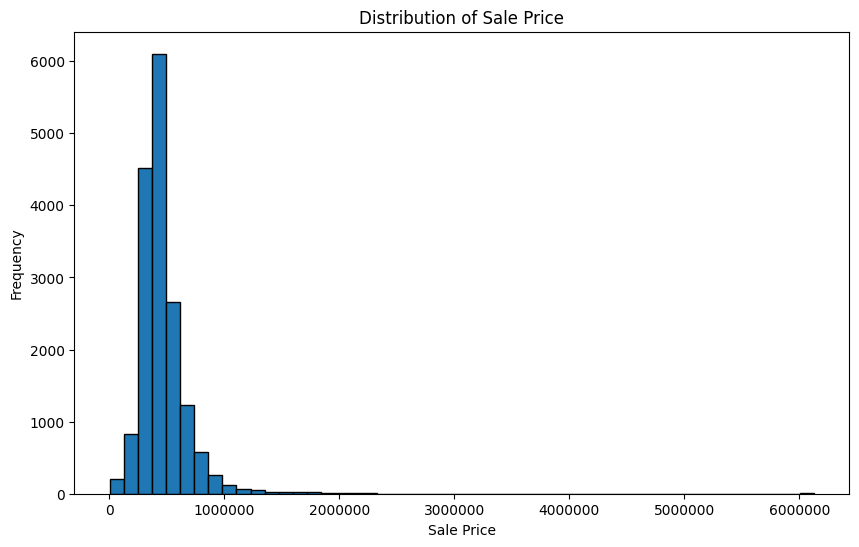

In [33]:
# exploratory graphs
# histogram of 'sale_price'
plt.figure(figsize=(10, 6))
plt.hist(housing['sale_price'], bins=50, edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

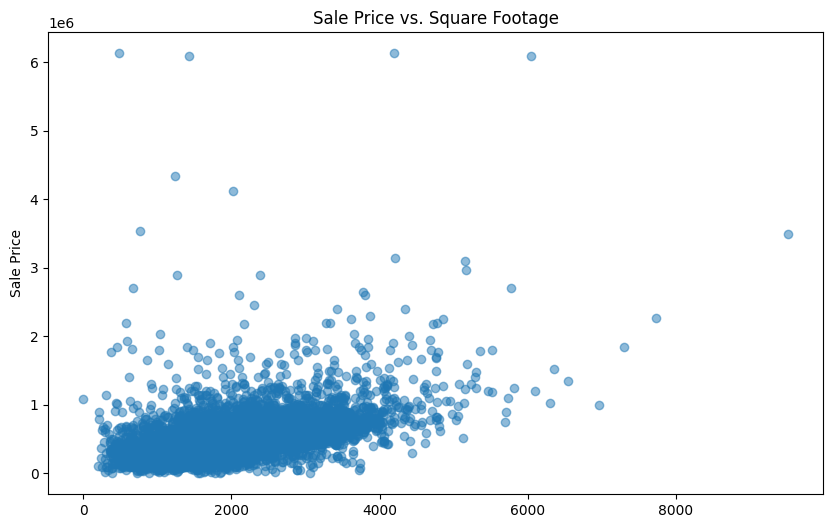

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(housing['house_square_feet'], housing['sale_price'], alpha=0.5)
plt.ylabel('Sale Price')
plt.title(f'Sale Price vs. Square Footage')
plt.show()

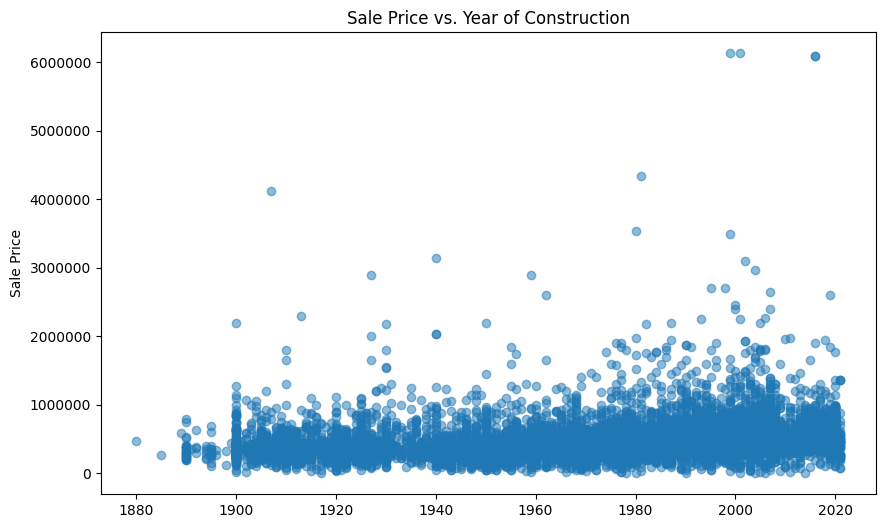

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(housing['year_built'], housing['sale_price'], alpha=0.5)
plt.ylabel('Sale Price')
plt.title(f'Sale Price vs. Year of Construction')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

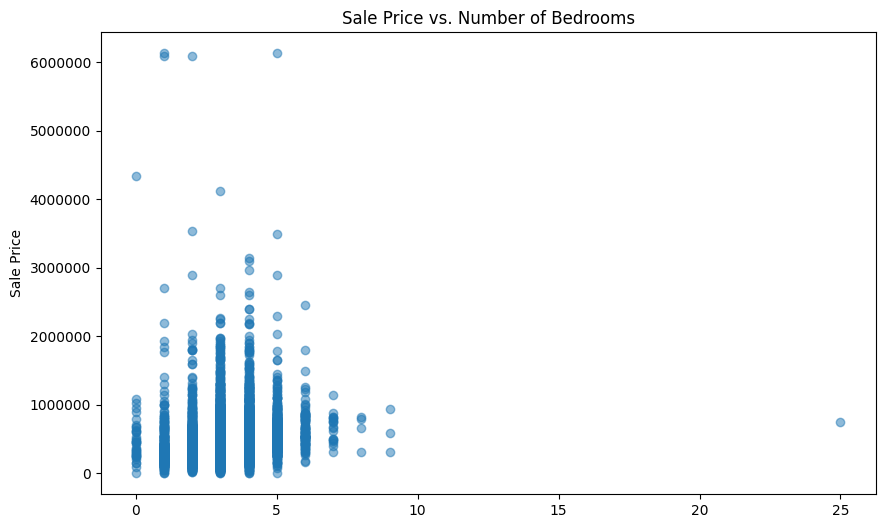

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(housing['bedrooms'], housing['sale_price'], alpha=0.5)
plt.ylabel('Sale Price')
plt.title(f'Sale Price vs. Number of Bedrooms')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

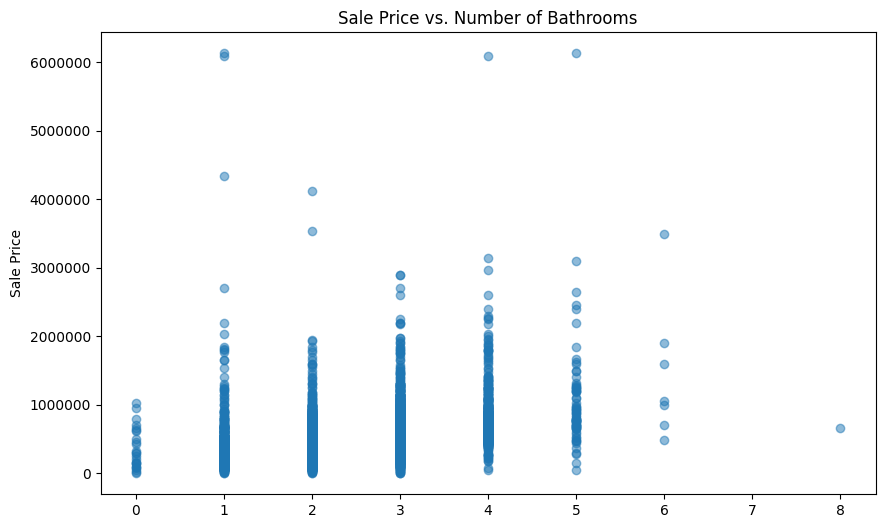

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(housing['bathrooms'], housing['sale_price'], alpha=0.5)
plt.ylabel('Sale Price')
plt.title(f'Sale Price vs. Number of Bathrooms')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

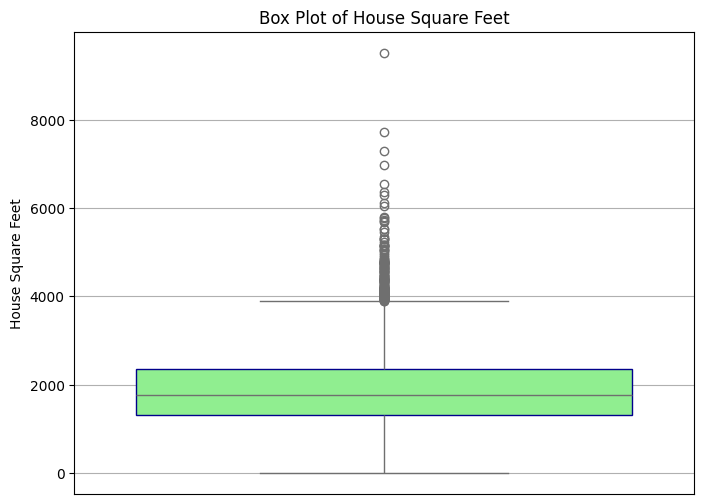

In [47]:
# Box plot for house_square_feet
plt.figure(figsize=(8, 6))
housing.boxplot(column='house_square_feet')
plt.title('Box Plot of House Square Feet')
sns.boxplot(data=housing, y='house_square_feet', color='skyblue', boxprops=dict(facecolor='lightgreen', edgecolor='darkblue'))
plt.ylabel('House Square Feet')
plt.show()

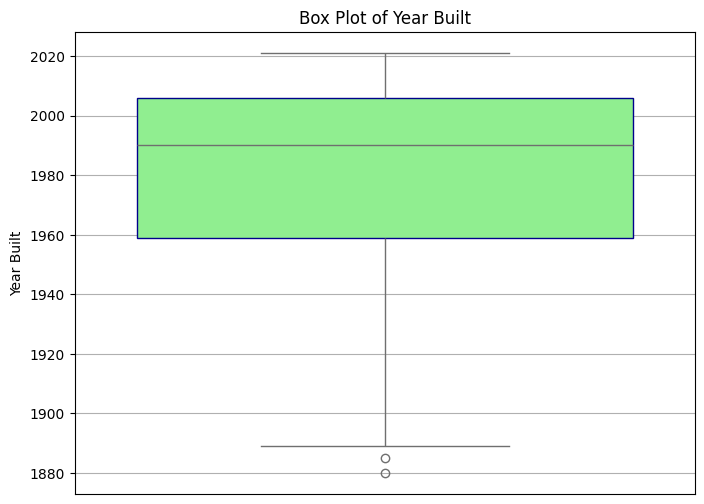

In [48]:
# Box plot for year_built
plt.figure(figsize=(8, 6))
housing.boxplot(column='year_built')
plt.title('Box Plot of Year Built')
plt.ylabel('Year Built')
sns.boxplot(data=housing, y='year_built', color='skyblue', boxprops=dict(facecolor='lightgreen', edgecolor='darkblue'))
plt.show()

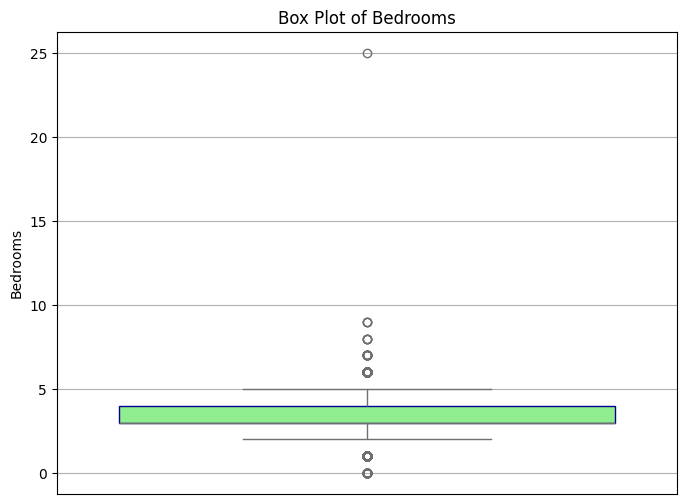

In [49]:
# Box plot for bedrooms
plt.figure(figsize=(8, 6))
housing.boxplot(column='bedrooms')
plt.title('Box Plot of Bedrooms')
sns.boxplot(data=housing, y='bedrooms', color='skyblue', boxprops=dict(facecolor='lightgreen', edgecolor='darkblue'))
plt.ylabel('Bedrooms')
plt.show()

We identified and handled missing values in several columns. waterfront_type and view_quality had a large number of missing values and were dropped. Columns with a small number of missing values (hvac_description, exterior, interior, roof_cover) had those rows dropped.
Duplicate rows were identified and removed.
The sale_date column was dropped as it was deemed superfluous.

The histogram of sale_price showed a right-skewed distribution, indicating that most houses have lower sale prices, with a few outliers having very high prices. Generally, larger houses tend to have higher sale prices, although there is significant variability. There isn't a clear linear relationship between year built and sale price, suggesting that older and newer houses can both command high prices, and other factors are important. While there's a general trend of increasing price with more bedrooms and bathrooms, the relationship is not strictly linear and shows considerable spread.

The categorical variables show varying distributions of different house features.

In [12]:
print(cars.shape)
cars.head()

(976, 12)


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [50]:
print("Missing values per column in cars dataset:")
print(cars.isnull().sum())

print("\nNumber of duplicate rows in cars dataset:")
print(cars.duplicated().sum())

Missing values per column in cars dataset:
Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64

Number of duplicate rows in cars dataset:
0


The cars dataset is already relatively clean, but we will drop the first column and will still calculate descriptive statistics for numerical columns, identify categorical columns and print their value counts, and explore the distribution of price.

In [89]:
cars.drop(columns=['Unnamed: 0'], inplace=True)

In [90]:
# calculate and display descriptive statistics for numerical columns
print("Statistics for numerical columns in cars dataset:")
display(cars.describe())

# identify categorical columns and calculate value counts
categorical_cols = cars.select_dtypes(include='object').columns

print("\nValue counts for categorical columns in cars dataset:")
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(cars[col].value_counts())

# explore the distribution of the target variable 'Price'
print("\nDistribution of Price:")
print(f"Mean: {cars['Price'].mean()}")
print(f"Median: {cars['Price'].median()}")
print(f"Standard Deviation: {cars['Price'].std()}")
print(f"Minimum: {cars['Price'].min()}")
print(f"Maximum: {cars['Price'].max()}")

Statistics for numerical columns in cars dataset:


,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,9.760000e+02
mean,2016.963115,41571.195697,5.095287,7.410195e+05
std,2.818742,24390.995134,0.446224,3.673234e+05
min,2011.000000,1117.000000,4.000000,1.880000e+05
25%,2015.000000,22676.750000,5.000000,4.757500e+05
50%,2017.000000,37570.500000,5.000000,6.665000e+05
75%,2019.000000,57421.250000,5.000000,8.830000e+05
max,2022.000000,99495.000000,8.000000,2.941000e+06



Value counts for categorical columns in cars dataset:

Value counts for 'Make':
Make
Hyundai          305
Maruti Suzuki    293
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Skoda              5
Nissan             4
Jeep               4
Datsun             3
Name: count, dtype: int64

Value counts for 'Color':
Color
white     200
red       187
grey      164
silver    132
blue      128
brown      70
black      35
orange     19
bronze     12
beige       9
yellow      6
purple      6
golden      3
maroon      3
green       2
Name: count, dtype: int64

Value counts for 'Body_Type':
Body_Type
hatchback    484
sedan        227
suv          206
muv           38
crossover     21
Name: count, dtype: int64

Value counts for 'No_of_Owners':
No_of_Owners
1st    818
2nd    154
3rd      4
Name: count, dtype: int64

Value counts for 'Fuel_T

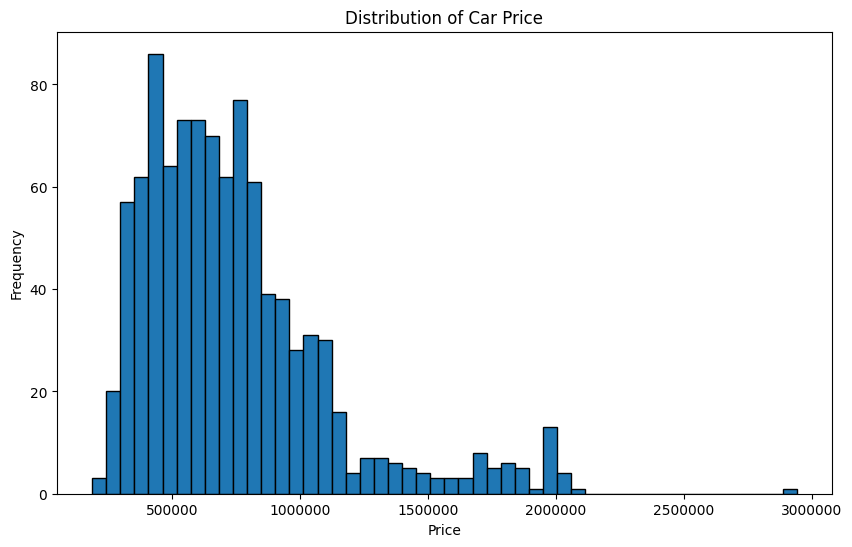

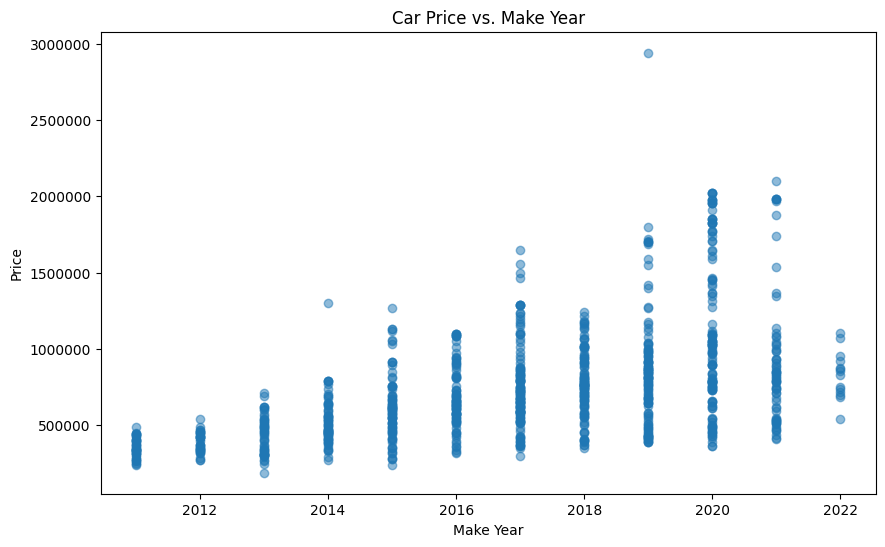

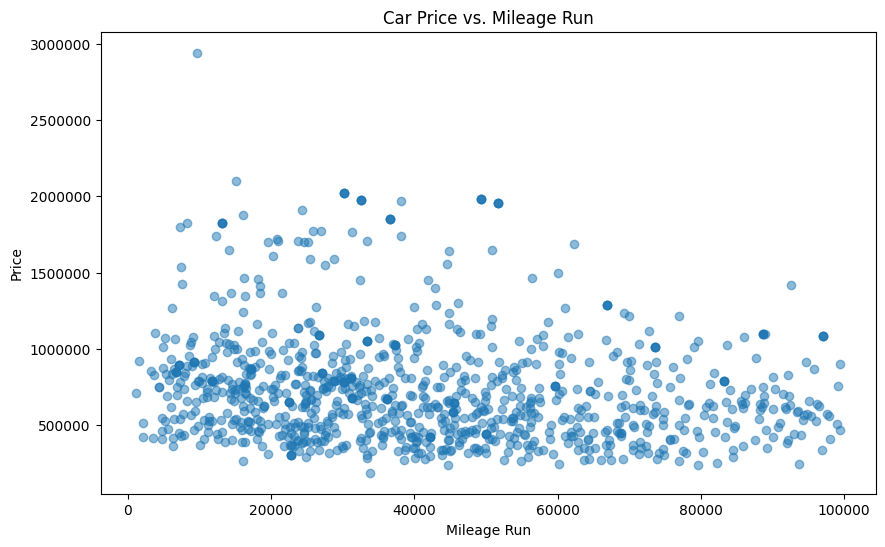

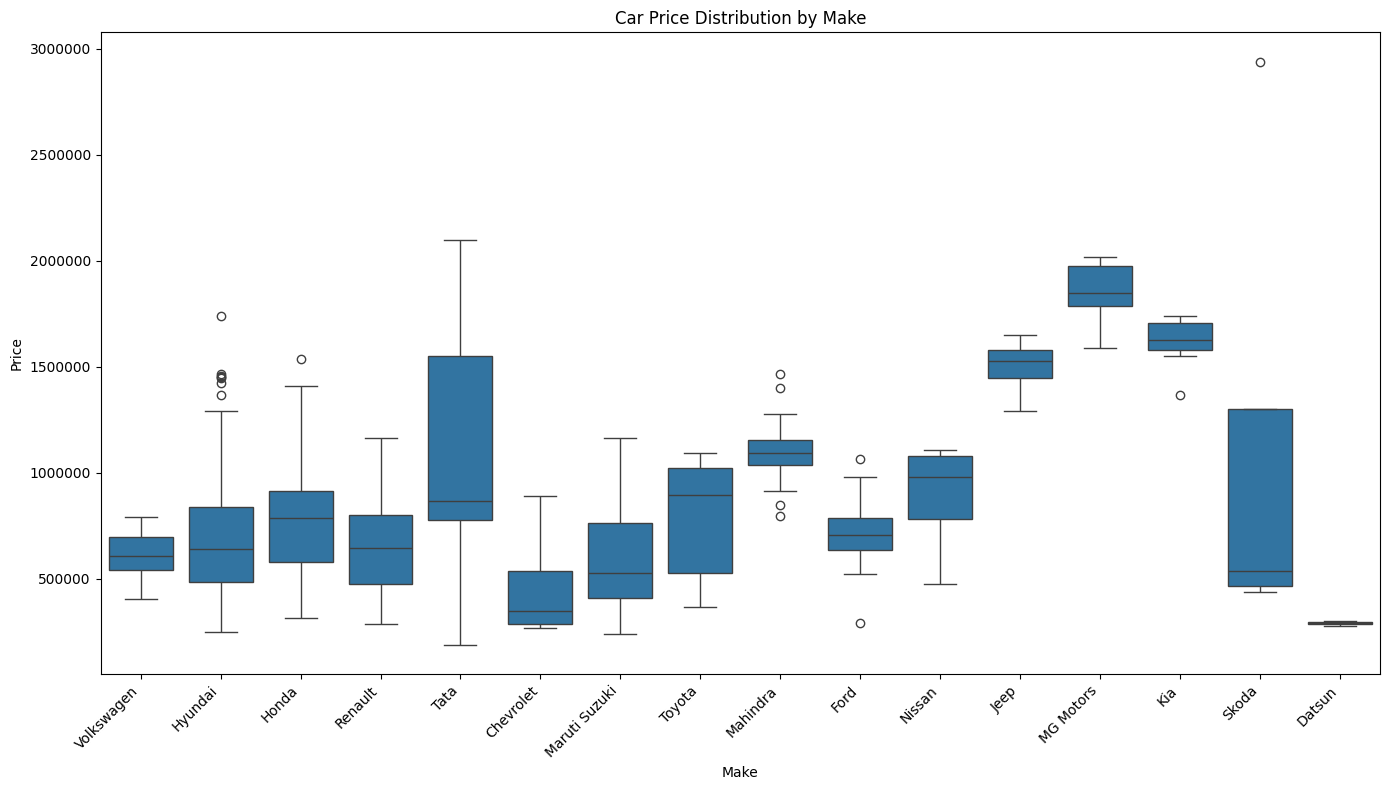

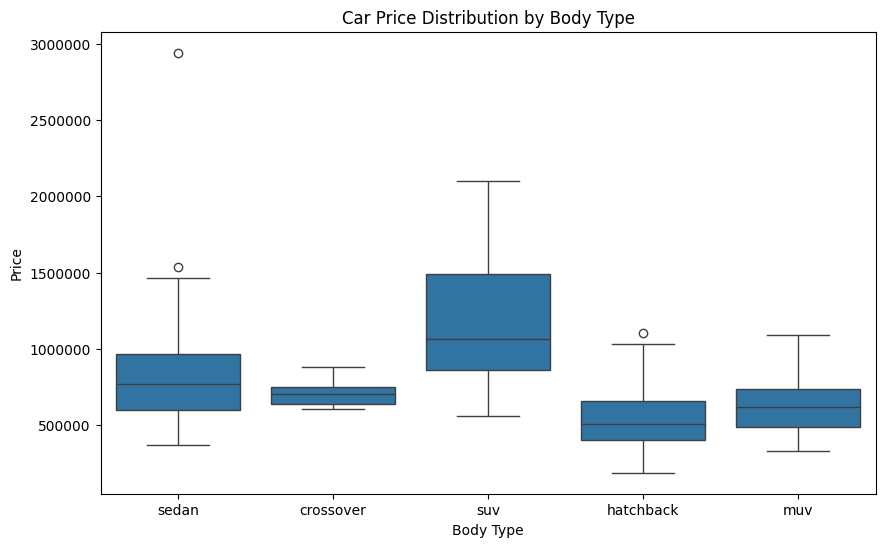

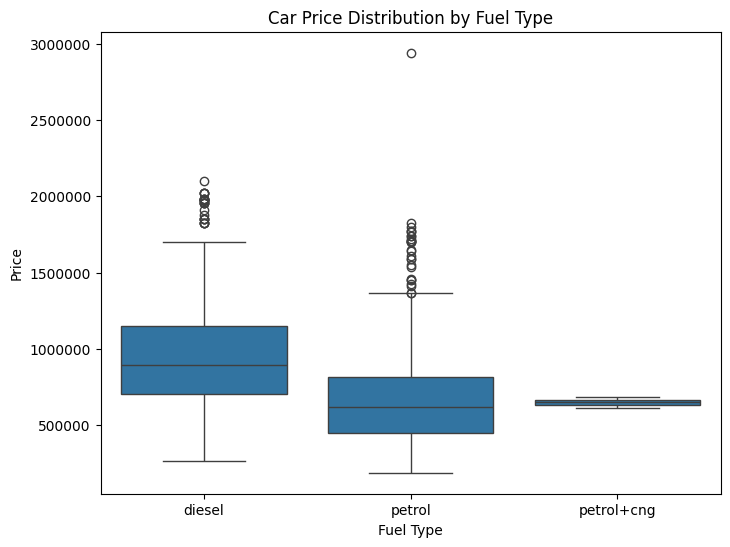

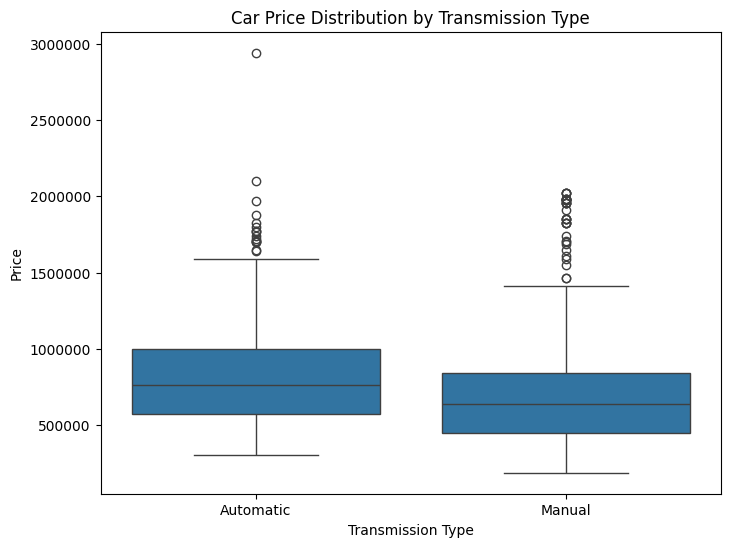

In [53]:
# histogram of 'Price'
plt.figure(figsize=(10, 6))
plt.hist(cars['Price'], bins=50, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Price')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# scatter plot of 'Price' vs. 'Make_Year'
plt.figure(figsize=(10, 6))
plt.scatter(cars['Make_Year'], cars['Price'], alpha=0.5)
plt.xlabel('Make Year')
plt.ylabel('Price')
plt.title('Car Price vs. Make Year')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# scatter plot of 'Price' vs. 'Mileage_Run'
plt.figure(figsize=(10, 6))
plt.scatter(cars['Mileage_Run'], cars['Price'], alpha=0.5)
plt.xlabel('Mileage Run')
plt.ylabel('Price')
plt.title('Car Price vs. Mileage Run')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# box plot for 'Price' across different 'Make' categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='Make', y='Price', data=cars)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car Price Distribution by Make')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# box plot for 'Price' across different 'Body_Type' categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body_Type', y='Price', data=cars)
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.title('Car Price Distribution by Body Type')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# box plot for 'Price' across different 'Fuel_Type' categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=cars)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Car Price Distribution by Fuel Type')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# box plot for 'Price' across different 'Transmission_Type' categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission_Type', y='Price', data=cars)
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.title('Car Price Distribution by Transmission Type')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


*   The dataset contains no missing values or duplicate rows
*   The Price distribution is right-skewed, with a mean of approximately \$683,994, a median of \$500,000, and a large standard deviation (\$644,447), indicating a wide range of car prices. The minimum price is \$40,000 and the maximum is \$3,500,000
*   The majority of cars in the dataset are of the 'Sedan' body type and use 'Petrol' fuel
* 'Manual' transmission is more common than 'Automatic'
*   Visualizations showed a general trend of newer cars (higher 'Make\_Year') having higher prices
*   Visualizations indicated a slight negative relationship between 'Mileage\_Run' and 'Price', where cars with higher mileage tend to have lower prices
*   The distribution of car prices varies significantly across different car 'Make' and 'Body\_Type' categories

In [54]:
print(airbnb.shape)
airbnb.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


# Task
Analyze the "airbnb" dataset by cleaning the data, performing exploratory data analysis (EDA), and generating visualizations.

## Examine and clean the airbnb data

### Subtask:
Check for missing values, duplicates, and inconsistencies in the `airbnb` DataFrame. Handle them appropriately.


**Reasoning**:
Check for missing values and duplicate rows in the airbnb dataset to understand its cleanliness.



In [79]:
print("Missing values per column in airbnb dataset:")
print(airbnb.isnull().sum())

print("\nNumber of duplicate rows in airbnb dataset:")
print(airbnb.duplicated().sum())

Missing values per column in airbnb dataset:
Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

Number of duplicate rows in airbnb dataset:
17


**Reasoning**:
Handle missing values and duplicate rows based on the previous output. Drop columns with a high number of missing values and drop rows with a small number of missing values or duplicates.



In [80]:
# Drop columns with a high percentage of missing values / superfluous columns
airbnb.drop(columns=['Review Scores Rating (bin)', 'Review Scores Rating', 'Host Since', 'Name'], inplace=True)

# Drop rows with a small number of missing values
airbnb.dropna(subset=['Property Type', 'Zipcode', 'Beds'], inplace=True)

# Drop duplicate rows
airbnb.drop_duplicates(inplace=True)

print("Missing values per column after cleaning:")
print(airbnb.isnull().sum())

print("\nNumber of duplicate rows after cleaning:")
print(airbnb.duplicated().sum())

print("\nShape of the DataFrame after cleaning:")
print(airbnb.shape)

Missing values per column after cleaning:
Host Id              0
Neighbourhood        0
Property Type        0
Room Type            0
Zipcode              0
Beds                 0
Number of Records    0
Number Of Reviews    0
Price                0
dtype: int64

Number of duplicate rows after cleaning:
0

Shape of the DataFrame after cleaning:
(30054, 9)


In [81]:
# calculate and display descriptive statistics for numerical columns
print("Statistics for numerical columns in airbnb dataset:")
display(airbnb.describe())

# identify categorical columns and calculate value counts
categorical_cols = airbnb.select_dtypes(include='object').columns

print("\nValue counts for categorical columns in airbnb dataset:")
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(airbnb[col].value_counts())

Statistics for numerical columns in airbnb dataset:


,Host Id,Zipcode,Beds,Number of Records,Number Of Reviews
count,3.005400e+04,30054.000000,30054.000000,30054.0,30054.000000
mean,1.271487e+07,10582.995541,1.530545,1.0,12.054934
std,1.189124e+07,923.701650,1.015854,0.0,21.967412
min,5.000000e+02,1003.000000,0.000000,1.0,0.000000
25%,2.692112e+06,10017.000000,1.000000,1.0,0.000000
50%,8.530059e+06,10065.000000,1.000000,1.0,3.000000
75%,2.117910e+07,11216.000000,2.000000,1.0,13.000000
max,4.303307e+07,99135.000000,16.000000,1.0,257.000000



Value counts for categorical columns in airbnb dataset:

Value counts for 'Neighbourhood ':
Neighbourhood 
Manhattan        15869
Brooklyn         11494
Queens            2211
Bronx              335
Staten Island      145
Name: count, dtype: int64

Value counts for 'Property Type':
Property Type
Apartment          26765
House               2026
Loft                 739
Bed & Breakfast      177
Townhouse            134
Condominium           94
Other                 47
Dorm                  30
Boat                   8
Villa                  8
Camper/RV              7
Treehouse              4
Bungalow               4
Tent                   4
Cabin                  2
Hut                    2
Lighthouse             1
Chalet                 1
Castle                 1
Name: count, dtype: int64

Value counts for 'Room Type':
Room Type
Entire home/apt    16887
Private room       12368
Shared room          799
Name: count, dtype: int64

Value counts for 'Price':
Price
150    1464
100    1192
20

In [82]:
# convert 'Price' column to numeric
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

# explore the distribution of price
print("\nDistribution of Price:")
print(f"Mean: {airbnb['Price'].mean()}")
print(f"Median: {airbnb['Price'].median()}")
print(f"Standard Deviation: {airbnb['Price'].std()}")
print(f"Minimum: {airbnb['Price'].min()}")
print(f"Maximum: {airbnb['Price'].max()}")


Distribution of Price:
Mean: 153.7182259414226
Median: 125.0
Standard Deviation: 108.69407815159599
Minimum: 10.0
Maximum: 999.0


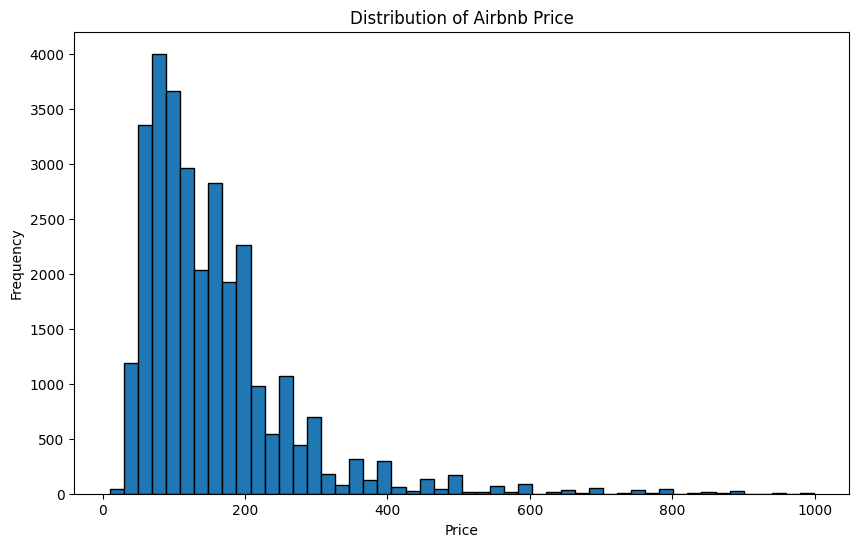

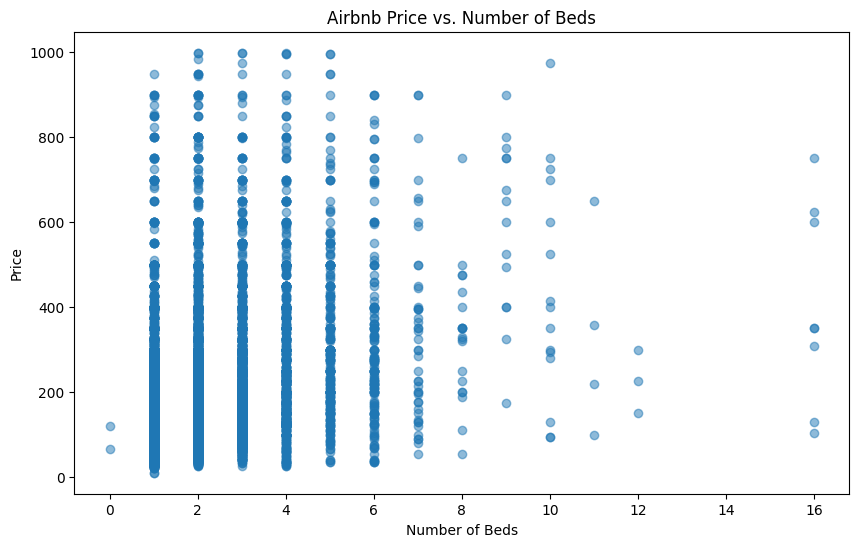

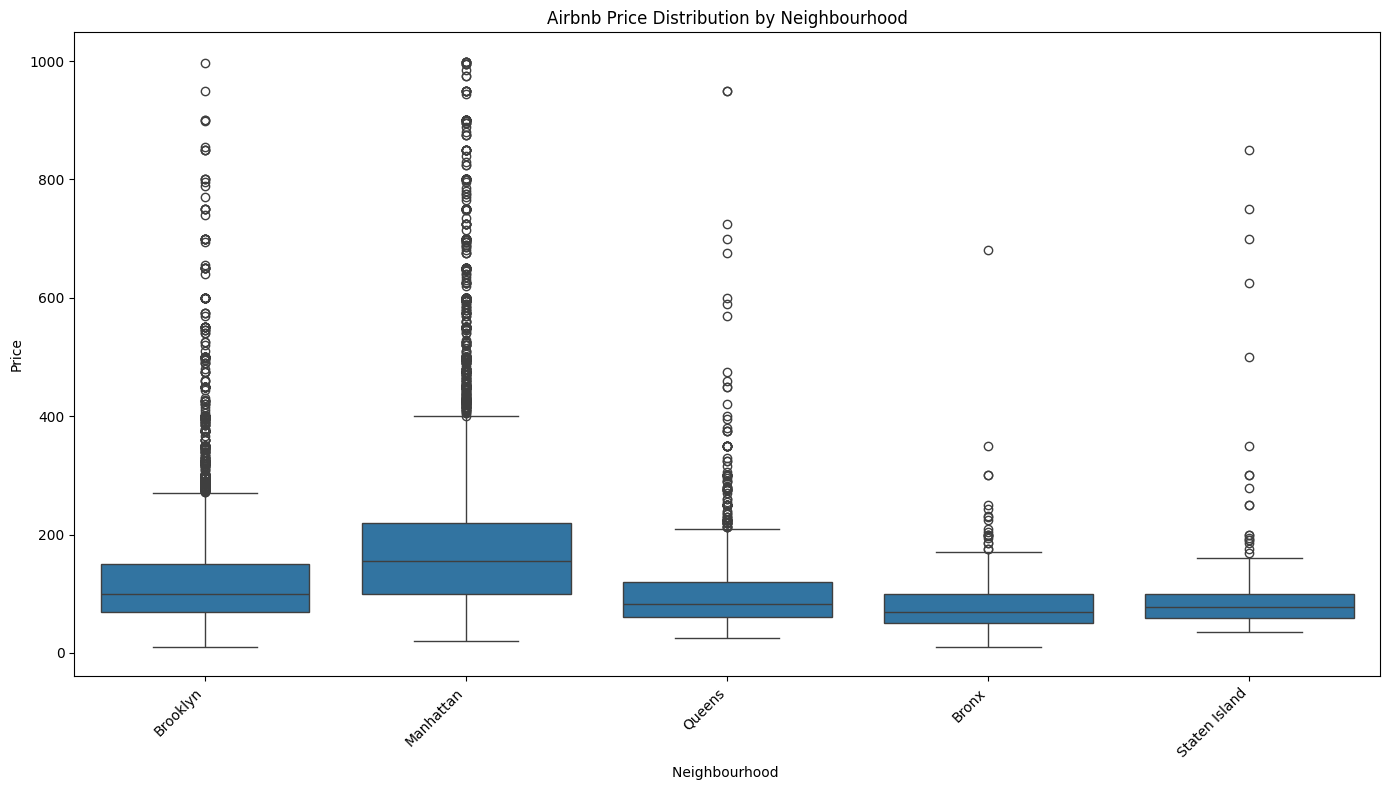

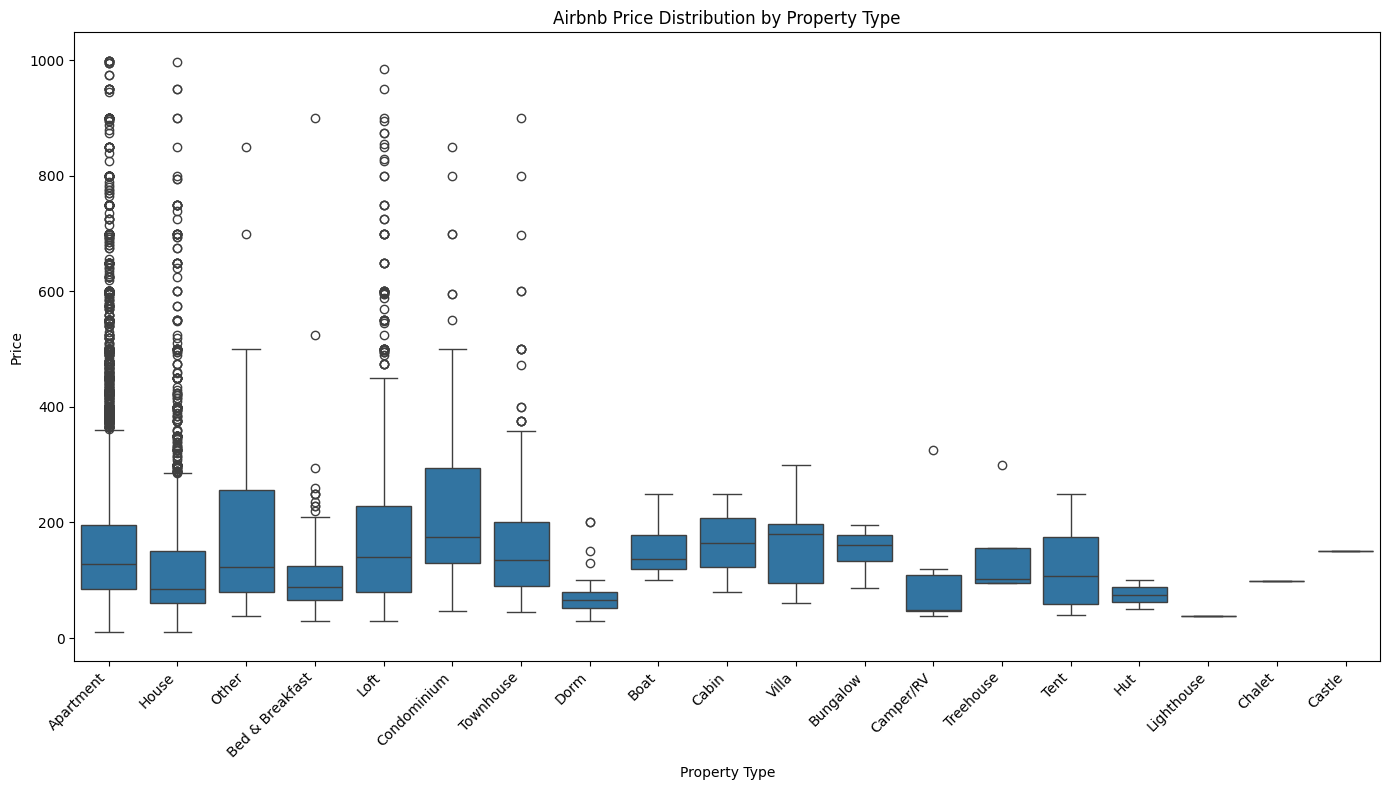

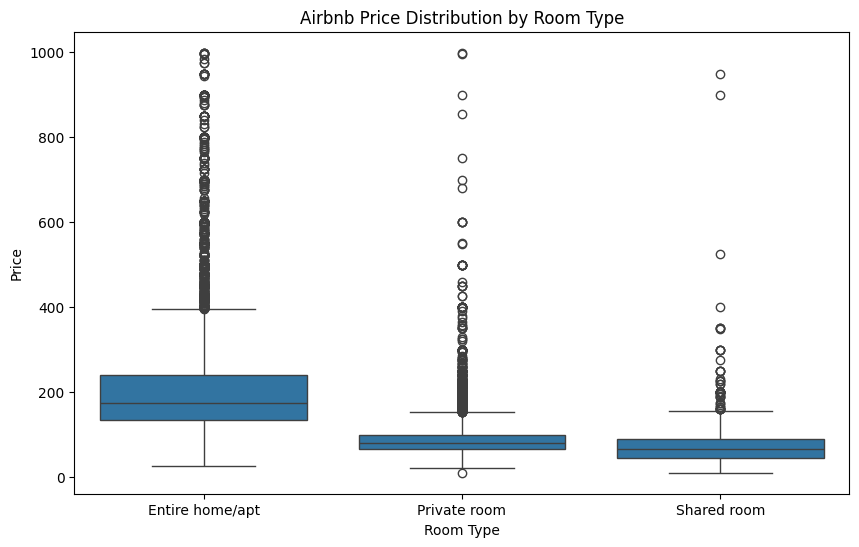

In [83]:
# histogram of price
plt.figure(figsize=(10, 6))
plt.hist(airbnb['Price'], bins=50, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Price')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# scatter plot of price vs. beds
plt.figure(figsize=(10, 6))
plt.scatter(airbnb['Beds'], airbnb['Price'], alpha=0.5)
plt.xlabel('Number of Beds')
plt.ylabel('Price')
plt.title('Airbnb Price vs. Number of Beds')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# box plot for price across neighbourhood
plt.figure(figsize=(14, 8))
sns.boxplot(x='Neighbourhood ', y='Price', data=airbnb)
plt.xlabel('Neighbourhood ')
plt.ylabel('Price')
plt.title('Airbnb Price Distribution by Neighbourhood')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# box plot for price across property type
plt.figure(figsize=(14, 8))
sns.boxplot(x='Property Type', y='Price', data=airbnb)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Airbnb Price Distribution by Property Type')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Create box plot for price across room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Room Type', y='Price', data=airbnb)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Airbnb Price Distribution by Room Type')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

After cleaning, columns with a high percentage of missing values were dropped, and rows with a small number of missing values were removed, resulting in a dataset of 30227 rows and 11 columns with no missing values or duplicates.
The 'Price' column initially contained non-numeric values but we converted it to a numeric data type to make it possible to analyze.

There is a large quantity of property types but property types are not represented equally. In particular, chalet and castle are quite uncommon. For more uncommon property types, the distribution of the price variable is much narrower, understandably. The average price of an Airbnb for 1 night is around 150 dollars, but the standard deviation is sizable in comparison, around 100 dollars. Manhattan is the most expensive borough to rent an Airbnb in, on average.

**Question 2**

In [95]:
# identify categorical columns
categorical_cols_housing = housing.select_dtypes(include='object').columns

# apply one-hot encoding
housing_encoded = pd.get_dummies(housing, columns=categorical_cols_housing, drop_first=True)

In [94]:
# identify categorical columns in the cars dataset
categorical_cols_cars = cars.select_dtypes(include='object').columns

# apply one-hot encoding to categorical columns
cars_encoded = pd.get_dummies(cars, columns=categorical_cols_cars, drop_first=True)

In [93]:
# identify categorical columns in the airbnb dataset
categorical_cols_airbnb = airbnb.select_dtypes(include='object').columns

# apply one-hot encoding to categorical columns
airbnb_encoded = pd.get_dummies(airbnb, columns=categorical_cols_airbnb, drop_first=True)

**Question 3**

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# train-test split for housing data
housing_train, housing_test = train_test_split(housing_encoded, test_size=0.2, random_state=104)

print("Shape of housing_train:", housing_train.shape)
print("Shape of housing_test:", housing_test.shape)

Shape of housing_train: (13400, 44)
Shape of housing_test: (3351, 44)


In [100]:
# train-test split for cars data
cars_train, cars_test = train_test_split(cars_encoded, test_size=0.2, random_state=104)

print("Shape of cars_train:", cars_train.shape)
print("Shape of cars_test:", cars_test.shape)

Shape of cars_train: (780, 46)
Shape of cars_test: (196, 46)


In [101]:
# train-test split for airbnb data
airbnb_train, airbnb_test = train_test_split(airbnb_encoded, test_size=0.2, random_state=104)

print("Shape of airbnb_train:", airbnb_train.shape)
print("Shape of airbnb_test:", airbnb_test.shape)

Shape of airbnb_train: (24043, 30)
Shape of airbnb_test: (6011, 30)
